##  Uber Supply-Demand Gap Case Study
<u>Aim of this study</u>: Identify possible root causes of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation 

## Importing Necessary Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
import datetime
import random

In [14]:
df = pd.read_csv('../data/Uber Request Data.csv') #Reading the data

In [15]:
df.head() #Glimpse of data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [16]:
df.shape #Checking the number of columns and rows

(6745, 6)

In [17]:
df_1 = df.copy() #Better to work on a copy of dataset rather than modifying the original data /

## Data Cleaning

In [18]:
df_1['Driver id'].nunique() #Checking for number of unique values

300

Driver Id's are repeating as there can be data for the same driver for multiple rides.

In [19]:
df_1['Request id'].nunique()

6745

 Request ID is unique as expected each request should have a unique ID

In [20]:
df.duplicated().value_counts() #Checking if any duplicate row is there

False    6745
Name: count, dtype: int64

No duplicate records exist as it matches with the row count of 6745

## Handling Missing Values

Checking percentage of missing values for all the columns

In [21]:
(df_1.isna().sum()/df_1.shape[0])*100 #Calculating percentage of missing values for all columns

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

#### Columns <u>Driver id, Drop timestamp columns</u> have significant values missing

## Missing Values Analysis for Driver Id and Drop Time Stamp Columns

<Axes: >

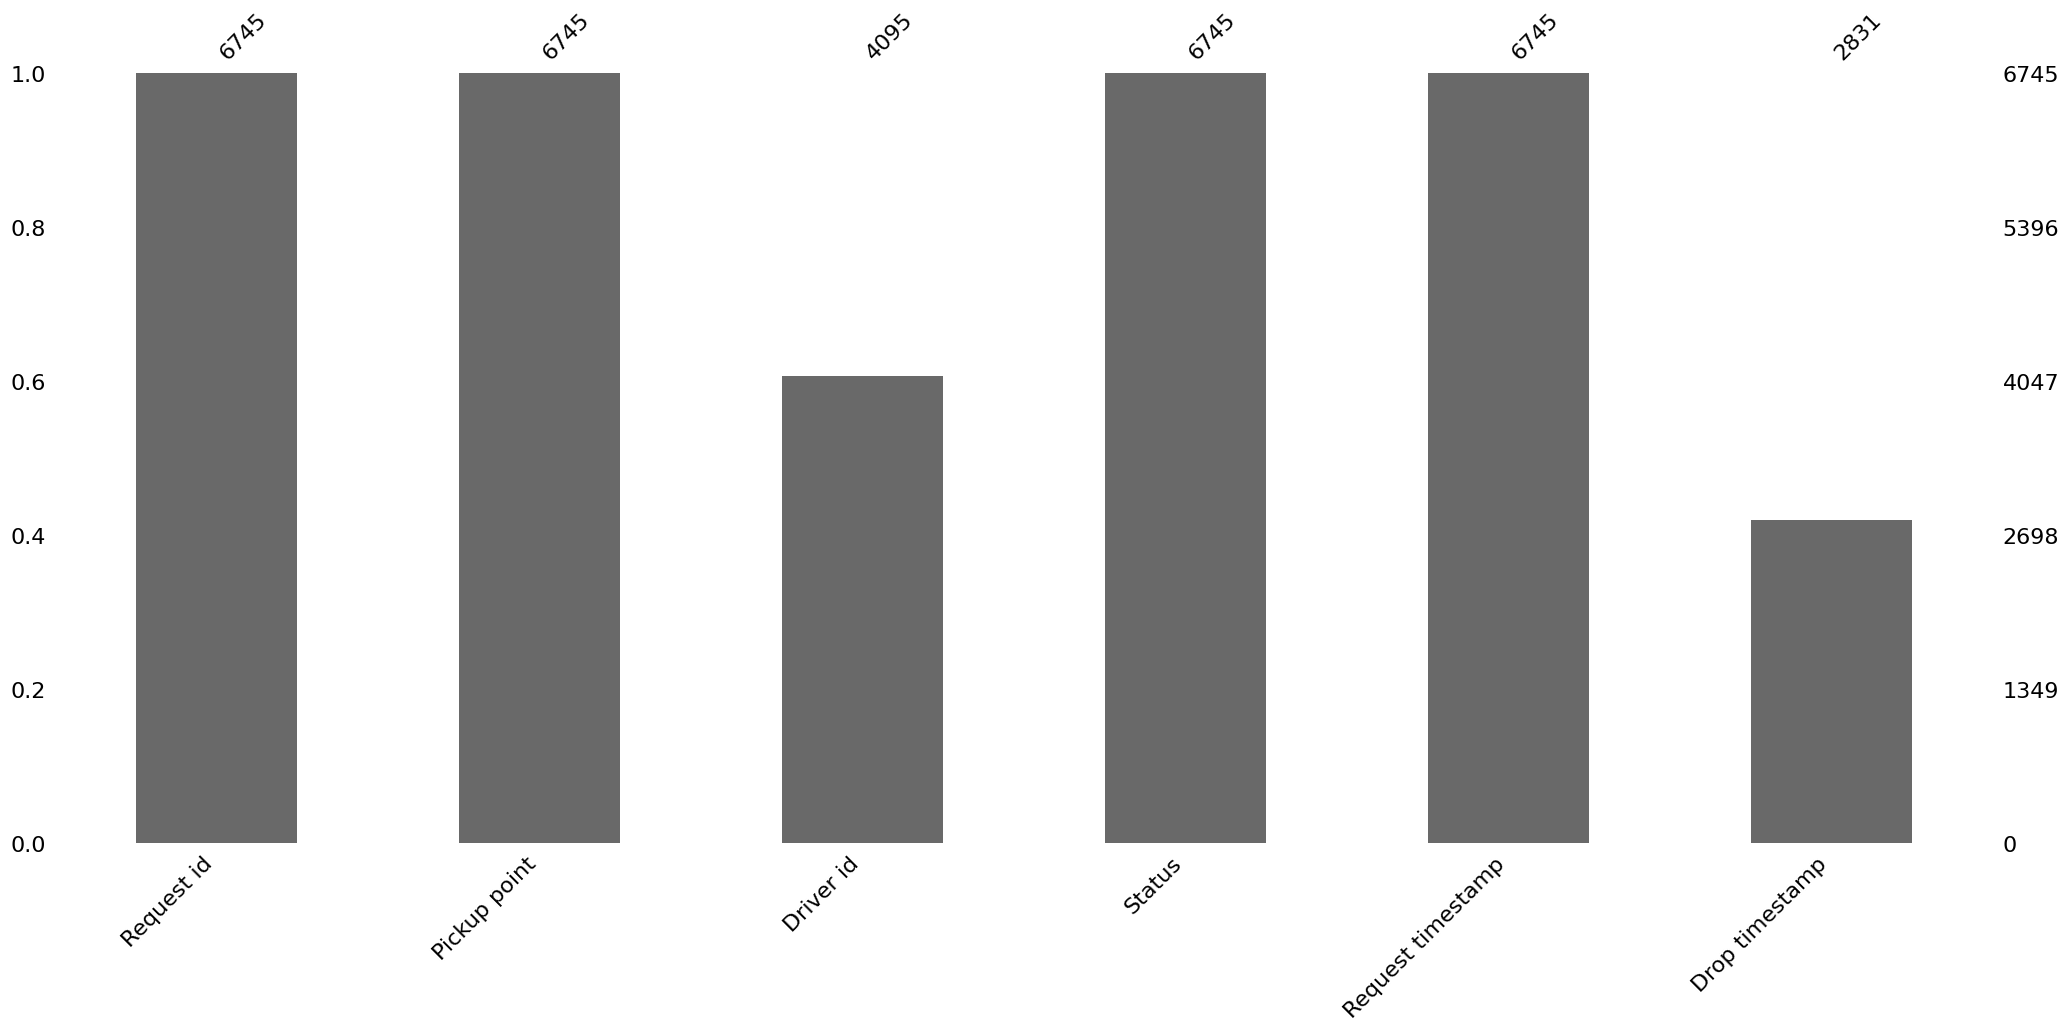

In [23]:
msno.bar(df_1) #Bar graph for count for missing values

As visible from the above graph around 4095 and 2831 are missing value counts for Driver id and Drop timestamp columns

<Axes: >

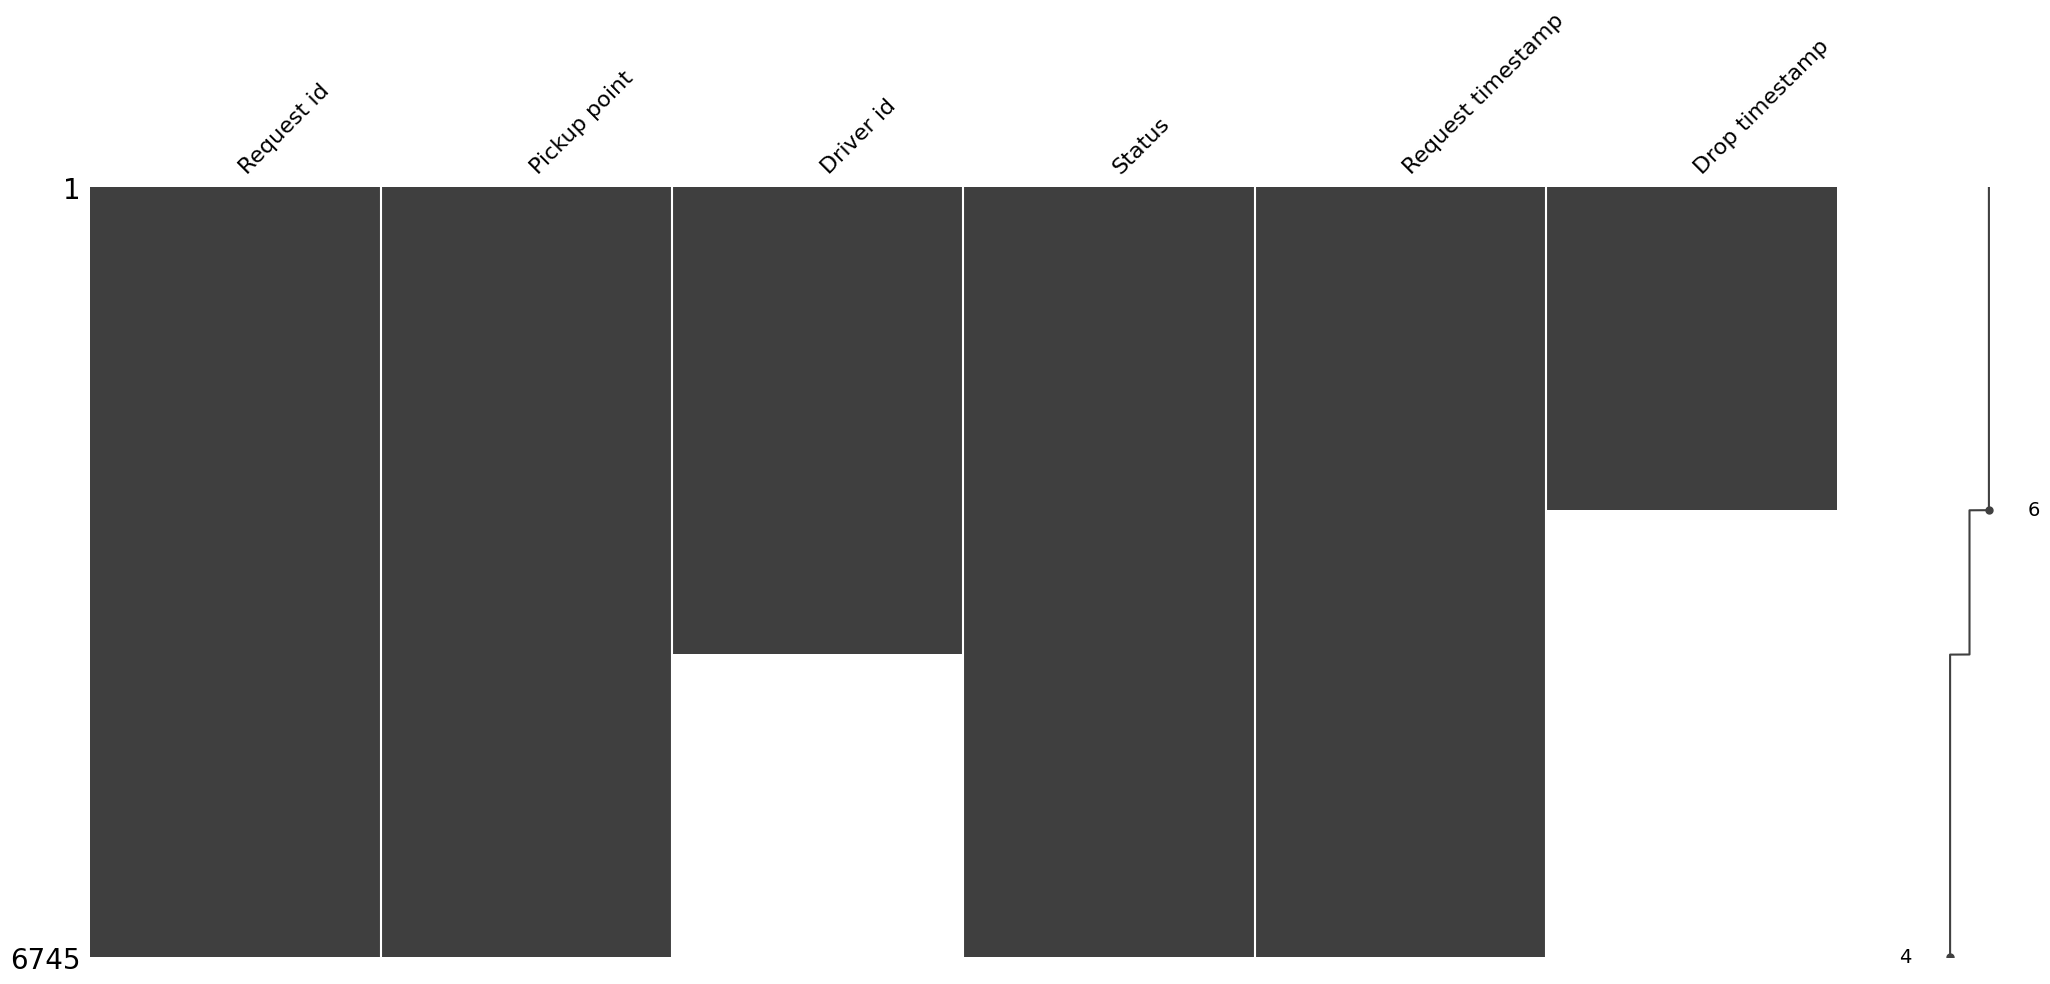

In [24]:
msno.matrix(df_1) #Helps in analyzing to see any pattern in missing values

The plot appears blank(white) wherever there are missing values for any column.
- Driver Id and Drop time have some common rows where the values are missing for both depicted by the white region.
- It suggests that there might be some impact of a column which led to both Driver Id and Drop timestamp having missing values.
- The Numbers (4 and 6): These represent the minimum and maximum number of non-null columns found in any given row. In our Uber dataset, every row has at least 4 valid columns, and the most complete rows have all 6.   

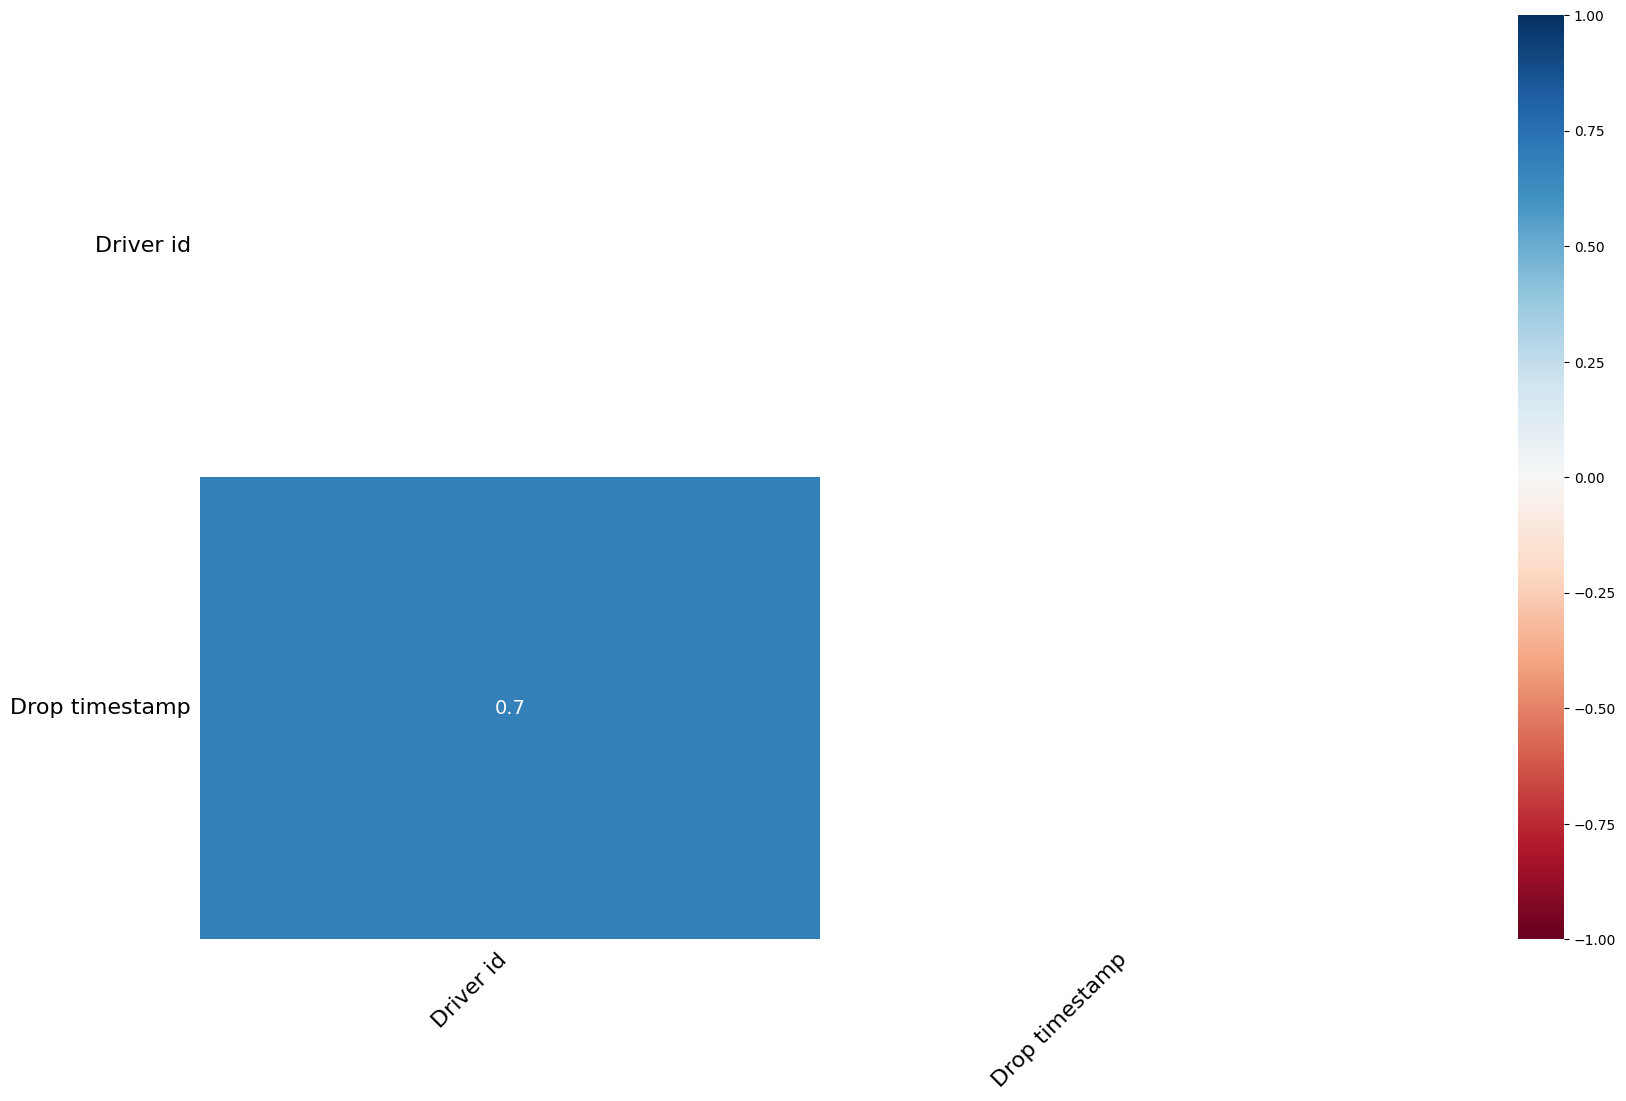

In [25]:
msno.heatmap(df_1) #Plotting correlation matrix for columns where values are missing
plt.show()

<ul>
<li>Value close to  1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.</li>
<li>A value near 0 means there is no relationship between the occurrence of missing values of two variables.</li>
<li>A value near -1 means if one variable appears then for the  other variable data is very likely to be present.</li>
</ul>   
There seems to be a <b>strong positive correlation</b> of <u>missing values</u> between <b>DriverId and Drop timestamp values</b> which indicates that the missing value type is of <b>MAR(Missing at Random)</b> and depends on some column in data which has led to these values missing.

In [27]:
df_1[df_1['Driver id'].isna()] #Analyzing data where Driver Id is missing

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


- From above we can see that Driver id is null for those cases where the Status is <i>'No cars available'</i>.
- Which is expected as no driver will be assigned in such cases and driver id would be missing.

As driverId is  numeric we can replace them with unique values which are not there previously so that they do not impact the data as such.

In [28]:
df_1[df_1['Driver id'].isna()]['Status'].value_counts() #Checking count of rows having driver Id missing


Status
No Cars Available    2650
Name: count, dtype: int64

There are total 2650 values missing in driver id column

In [29]:
df_1['Driver id'].max() #max value for driver Id

np.float64(300.0)

In [30]:
df_1['Driver id'].min() #minimum value for driver Id

np.float64(1.0)

From the above max value of the driver id column is 300 and min is 1 so we can take random sample of unique values after 300 for the 2650 rows with missing driver id.

In [31]:
unique_random_driver_ids = np.array(random.sample(range(301, 4000), 2650)) #Creating random unique values after 300 with size=2650

In [32]:
len(np.unique(unique_random_driver_ids))

2650

In [33]:
#Assigning the random unique values where driver Id is missing
df_1.loc[df_1['Driver id'].isna(),'Driver id'] = unique_random_driver_ids 

In [34]:
df_1[df_1['Driver id'].isna()]['Status'].value_counts() #Checking count of rows having driver Id missing


Series([], Name: count, dtype: int64)

Missing values for driver Id column has been dealt with.

In [35]:
(df_1.isna().sum()/df_1.shape[0])*100 #Calculating percentage of missing values for all columns

Request id            0.000000
Pickup point          0.000000
Driver id             0.000000
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

<b> Analyzing missing values for Drop Timestamp Column </b>

In [23]:
df_1[df_1['Drop timestamp'].isna()]['Status'].value_counts()

No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

- It is expected that drop timestamp day to be null where status is Cancelled or No cars available as the trip never took place.
- For Drop timestamp where values are Nan while converting to datettime it will get converted to Nat indicating no time is there for that data point.

## Standardizing Values

Standardizing Request and Drop Time Stamps columns by  replacing '-'  with '/'

In [36]:
df_1['Request timestamp'] = df_1['Request timestamp'].apply(lambda x:x.replace('-','/') if x else x)
df_1['Drop timestamp'] = df_1['Drop timestamp'].apply(lambda x:x.replace('-','/') if not(pd.isnull(x)) else x)

In [ ]:
df_1['Request timestamp'].head() #Checking if replacement has successfully applied

0        11/7/2016 11:51
1        11/7/2016 17:57
2         12/7/2016 9:17
3        12/7/2016 21:08
4    13/07/2016 08:33:16
Name: Request timestamp, dtype: str

In [38]:
df_1['Drop timestamp'].head() #Checking if replacement has successfully applied

0        11/7/2016 13:00
1        11/7/2016 18:47
2         12/7/2016 9:58
3        12/7/2016 22:03
4    13/07/2016 09:25:47
Name: Drop timestamp, dtype: str

Converting Request and Drop timestamp to datetime format

In [40]:
df_1['Request timestamp'] = pd.to_datetime(df_1['Request timestamp'],format = '%d/%m/%Y %H:%M',exact=False)
df_1['Drop timestamp'] = pd.to_datetime(df_1['Drop timestamp'],format = '%d/%m/%Y %H:%M',exact=False)

In [41]:
df_1.head() #Checking the data again

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00


In [42]:
df_1.dtypes #Checking for data type for all columns

Request id                    int64
Pickup point                    str
Driver id                   float64
Status                          str
Request timestamp    datetime64[us]
Drop timestamp       datetime64[us]
dtype: object

<b>Observations for Data Types of all Columns </b>
- Request Id is represented correctly as integer.
- Pickup point is represented correctly as object(string).
- Driver id Id would better represented by integer as it is numeric which needs to be converted to integer.
- Status is is represented correctly as object(string).
- Request timestamp is represented correctly as datetime.
- Drop timestamp is represented correctly as datetime.

Converting Driver Id column data to integer

In [43]:
df_1['Driver id'] = df_1['Driver id'].astype('int64') 

In [ ]:
df_1.dtypes #Checking if above operation is applied successfully

Request id                    int64
Pickup point                    str
Driver id                     int64
Status                          str
Request timestamp    datetime64[us]
Drop timestamp       datetime64[us]
dtype: object

### Feature Engineering

Formula for Trip Time = Drop Time - Request Time

In [45]:
df_1['Trip_Time']= df_1['Drop timestamp'] - df_1['Request timestamp']

In [46]:
df_1['Trip_Time'] #Place where Nat is there it indicates that trip never happened

0      0 days 01:09:00
1      0 days 00:50:00
2      0 days 00:41:00
3      0 days 00:55:00
4      0 days 00:52:00
             ...      
6740               NaT
6741               NaT
6742               NaT
6743               NaT
6744               NaT
Name: Trip_Time, Length: 6745, dtype: timedelta64[us]

Checking for any trip do we have any trips where the trip time exceeded a day.
If the trip time is more than a day it may indicate that there are outliers as usually the airport and city are not too far by.

In [47]:
df_1['Trip_Time'].apply(lambda x:x.days>0).value_counts() #Checking if trip time exceeded a day

Trip_Time
False    6745
Name: count, dtype: int64

From above it seems there are no trips which exceeded trip time of 1 day

In [48]:
df_1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Time
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,0 days 01:09:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,0 days 00:50:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,0 days 00:41:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,0 days 00:55:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,0 days 00:52:00


Converting the trip time to minutes

In [49]:
df_1['Trip_Time(min)'] = df_1['Trip_Time'].apply(lambda x:x.seconds/60)

In [50]:
df_1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Time,Trip_Time(min)
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,0 days 01:09:00,69.0
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,0 days 00:50:00,50.0
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,0 days 00:41:00,41.0
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,0 days 00:55:00,55.0
4,3112,City,1,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,0 days 00:52:00,52.0


In [51]:
df_1.drop('Trip_Time',axis = 1,inplace=True) #No Longer Require Trip_time column as we have created a column Trip_Time(min)

In [52]:
df_1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Time(min)
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0
4,3112,City,1,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,52.0


Splitting Date and Time from Date Time Columns

In [53]:
df_1['Trip_Request_Date'] = df_1['Request timestamp'].apply(lambda x :x.date())

In [54]:
df_1['Trip_Request_Time'] = df_1['Request timestamp'].apply(lambda x :x.time())

In [55]:
df_1['Trip_Drop_Date'] = df_1['Drop timestamp'].apply(lambda x :x.date())

In [56]:
df_1['Trip_Drop_Time'] = df_1['Drop timestamp'].apply(lambda x :x.time() if not pd.isnull(x) else x)

In [57]:
df_1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Time(min),Trip_Request_Date,Trip_Request_Time,Trip_Drop_Date,Trip_Drop_Time
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,2016-07-11,11:51:00,2016-07-11,13:00:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,2016-07-11,17:57:00,2016-07-11,18:47:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,2016-07-12,09:17:00,2016-07-12,09:58:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,2016-07-12,21:08:00,2016-07-12,22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,52.0,2016-07-13,08:33:00,2016-07-13,09:25:00


Checking for missing values for Trip Time

In [45]:
df_1[df_1['Trip_Time(min)'].isna()] 

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Time(min),Trip_Request_Date,Trip_Request_Time,Trip_Drop_Date,Trip_Drop_Time
2831,2905,City,1,Cancelled,2016-07-13 06:08:00,NaT,NaN,2016-07-13,06:08:00,NaT,NaT
2832,4805,City,1,Cancelled,2016-07-14 17:07:00,NaT,NaN,2016-07-14,17:07:00,NaT,NaT
2833,5202,Airport,1,Cancelled,2016-07-14 20:51:00,NaT,NaN,2016-07-14,20:51:00,NaT,NaT
2834,5927,City,1,Cancelled,2016-07-15 10:12:00,NaT,NaN,2016-07-15,10:12:00,NaT,NaT
2835,2347,Airport,2,Cancelled,2016-07-12 19:14:00,NaT,NaN,2016-07-12,19:14:00,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,2239,No Cars Available,2016-07-15 23:49:00,NaT,NaN,2016-07-15,23:49:00,NaT,NaT
6741,6752,Airport,3755,No Cars Available,2016-07-15 23:50:00,NaT,NaN,2016-07-15,23:50:00,NaT,NaT
6742,6751,City,1614,No Cars Available,2016-07-15 23:52:00,NaT,NaN,2016-07-15,23:52:00,NaT,NaT
6743,6754,City,2310,No Cars Available,2016-07-15 23:54:00,NaT,NaN,2016-07-15,23:54:00,NaT,NaT


In [62]:
df_1[df_1['Trip_Time(min)'].isna()]['Drop timestamp'].unique()

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[us]

- There seems to a large amount of rows where Trip time is missing which is due to the fact that Drop timestamp is also missing for them.
- So, we can impute the  missing values with 0 as the trip was never scheduled.

In [68]:
df_1['Trip_Time(min)'] = df_1['Trip_Time(min)'].fillna(0) #Filling missing values for Trip time to 0

In [70]:
df_1[df_1['Trip_Time(min)'].isna()] #Checking if missing values still exist for Trip Time

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Time(min),Trip_Request_Date,Trip_Request_Time,Trip_Drop_Date,Trip_Drop_Time


#### Creating Different Time Slots when the Request was made based on the Trip Request Time 
Time Slots to be created are as follows:
<table>
    <th>Time Range</th>
    <th>Time Slot Name </th>
    <tr>
        <td>12 am - 6 am</td>
        <td>Early Morning</td>
    </tr>
    <tr>
        <td>6 am - 12 pm</td>
        <td>Morning</td>
    </tr>
    <tr>
        <td>12 pm - 4 pm </td>
        <td>Afternoon</td>
    </tr>
    <tr>
        <td>4 pm - 7 pm</td>
        <td>Evening</td>
    </tr>
    <tr>
        <td>7 pm - 10 pm</td>
        <td>Night</td>
    </tr>
    <tr>
        <td>10 pm - 12 am</td>
        <td>Late Night</td>
    </tr>
</table>

In [75]:
##Creating Fixed Time slots for comparison
early_morning_start = datetime.time(0,0)
early_morning_end = datetime.time(6,0)

morning_start = datetime.time(6,0,1)
morning_end = datetime.time(12,0)

afternoon_start = datetime.time(12,0,1)
afternoon_end = datetime.time(16,0)

evening_start = datetime.time(16,0,1)
evening_end = datetime.time(19,0)

night_start = datetime.time(19,0,1)
night_end = datetime.time(22,0)

late_night_start = datetime.time(22,0,1)
late_night_end = datetime.time(23,59)


In [76]:
##Assigning the time slots as per the table above
time_slots = []
for request_time in df_1['Trip_Request_Time']:
    if early_morning_start <= request_time <=  early_morning_end:
        time_slots.append('Early Morning')
    elif morning_start <= request_time <=  morning_end:
        time_slots.append('Morning')
    elif afternoon_start <= request_time <=  afternoon_end:
        time_slots.append('Afternoon')
    elif evening_start <= request_time <=  evening_end:
        time_slots.append('Evening')
    elif night_start <= request_time <=  night_end:
        time_slots.append('Night')
    elif late_night_start <= request_time <=  late_night_end:
        time_slots.append('Late Night')

In [77]:
### Checking if Time Slots are allocated as per the time
print(time_slots.index('Early Morning'))
print(time_slots.index('Morning'))
print(time_slots.index('Afternoon'))
print(time_slots.index('Evening'))
print(time_slots.index('Night'))
print(time_slots.index('Late Night'))

7
0
11
1
3
17


In [78]:
print(time_slots[7],df_1['Trip_Request_Time'][7])
print(time_slots[0],df_1['Trip_Request_Time'][0])
print(time_slots[11],df_1['Trip_Request_Time'][11])
print(time_slots[1],df_1['Trip_Request_Time'][1])
print(time_slots[3],df_1['Trip_Request_Time'][3])
print(time_slots[1],df_1['Trip_Request_Time'][3])
print(time_slots[17],df_1['Trip_Request_Time'][17])

Early Morning 05:11:00
Morning 11:51:00
Afternoon 12:30:00
Evening 17:57:00
Night 21:08:00
Evening 21:08:00
Late Night 22:24:00


In [80]:
df_1['Time_Slot'] = time_slots #Create a column as Time_Slot
df_1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Time(min),Trip_Request_Date,Trip_Request_Time,Trip_Drop_Date,Trip_Drop_Time,Time_Slot
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,2016-07-11,11:51:00,2016-07-11,13:00:00,Morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,2016-07-11,17:57:00,2016-07-11,18:47:00,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,2016-07-12,09:17:00,2016-07-12,09:58:00,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,2016-07-12,21:08:00,2016-07-12,22:03:00,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,52.0,2016-07-13,08:33:00,2016-07-13,09:25:00,Morning


## Handling Outliers

In [71]:
df_1['Trip_Time(min)'].describe()

count    6745.000000
mean       21.998073
std        27.378771
min         0.000000
25%         0.000000
50%         0.000000
75%        48.000000
max        83.000000
Name: Trip_Time(min), dtype: float64

In [72]:
Q1 = df_1['Trip_Time(min)'].quantile(0.25)
Q3 = df_1['Trip_Time(min)'].quantile(0.75)
IQR = Q3 - Q1 #Calculating interquartile range
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(IQR)
print('Lower Limit is', low_lim)
print('Upper Limit is', up_lim)

48.0
Lower Limit is -72.0
Upper Limit is 120.0


In [73]:
df_1[(df_1['Trip_Time(min)']  > up_lim) | (df_1['Trip_Time(min)'] < low_lim)]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Time(min),Trip_Request_Date,Trip_Request_Time,Trip_Drop_Date,Trip_Drop_Time


There were no data points below (Q1-1.5 * IQR) and above (Q3 + 1.5 * IQR) suggesting there are not outliers

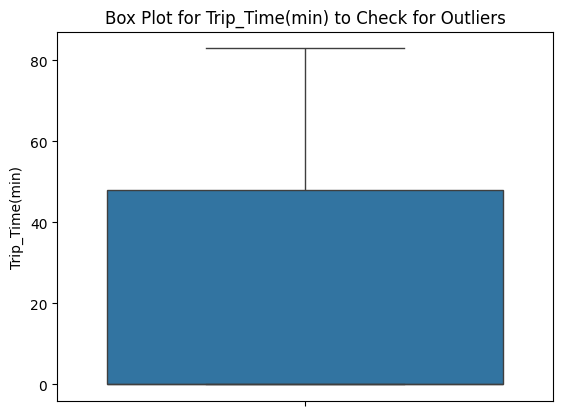

In [74]:
#Plotting box to detect any outliers
sns.boxplot(data = df_1['Trip_Time(min)'])
plt.ylabel('Trip_Time(min)')
plt.title('Box Plot for Trip_Time(min) to Check for Outliers')
plt.show()

From the above box plot we can see that:
 - There no outliers in data as the max value from the list of trips is 83 min which can be expected from city to airport or
     vice versa due to traffic or external reasons.
- For Most of the trips the total trip time was less than 48 mins.
- Majority of the rides were cancelled or No cars  were available  as almost 50% values have trip time of 0.

### Data Analysis and Exploration

#### Idle Time Calculation
- Idle Time is the total time the driver had to wait on the airport or city on average till he got another ride.
- If the idle time on average is high during a particular time slot, then that needs to be analyzed and a possible solution needs to be created so that the driver does not incur loss.

In [81]:
df_1.sort_values(by = ['Request timestamp'],inplace=True) #Sorting the data by Request TimeStamp

In [82]:
df_1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Time(min),Trip_Request_Date,Trip_Request_Time,Trip_Drop_Date,Trip_Drop_Time,Time_Slot
1303,1363,Airport,136,Trip Completed,2016-07-11 00:00:00,2016-07-11 01:11:00,71.0,2016-07-11,00:00:00,2016-07-11,01:11:00,Early Morning
4095,1362,City,3572,No Cars Available,2016-07-11 00:02:00,NaT,0.0,2016-07-11,00:02:00,NaT,NaT,Early Morning
1462,1367,City,155,Trip Completed,2016-07-11 00:05:00,2016-07-11 01:06:00,61.0,2016-07-11,00:05:00,2016-07-11,01:06:00,Early Morning
4096,1364,City,2095,No Cars Available,2016-07-11 00:06:00,NaT,0.0,2016-07-11,00:06:00,NaT,NaT,Early Morning
4097,1366,City,2336,No Cars Available,2016-07-11 00:09:00,NaT,0.0,2016-07-11,00:09:00,NaT,NaT,Early Morning


In [83]:
df_1['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

#### Adding Drop Point to Data

As mentioned in the problem that if pickup point is city then drop point is airport and vice-versa.So, adding a column as <b>Drop Point</b> for better clarity.

In [84]:
df_1['Drop Point'] = df['Pickup point'].apply(lambda x:'Airport' if x.lower() == 'city' else 'City')

In [85]:
df_1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Time(min),Trip_Request_Date,Trip_Request_Time,Trip_Drop_Date,Trip_Drop_Time,Time_Slot,Drop Point
1303,1363,Airport,136,Trip Completed,2016-07-11 00:00:00,2016-07-11 01:11:00,71.0,2016-07-11,00:00:00,2016-07-11,01:11:00,Early Morning,City
4095,1362,City,3572,No Cars Available,2016-07-11 00:02:00,NaT,0.0,2016-07-11,00:02:00,NaT,NaT,Early Morning,Airport
1462,1367,City,155,Trip Completed,2016-07-11 00:05:00,2016-07-11 01:06:00,61.0,2016-07-11,00:05:00,2016-07-11,01:06:00,Early Morning,Airport
4096,1364,City,2095,No Cars Available,2016-07-11 00:06:00,NaT,0.0,2016-07-11,00:06:00,NaT,NaT,Early Morning,Airport
4097,1366,City,2336,No Cars Available,2016-07-11 00:09:00,NaT,0.0,2016-07-11,00:09:00,NaT,NaT,Early Morning,Airport


In [92]:
##Creating Fixed Time slots for comparison
early_morning_time_diff = 6*60

morning_time_diff = 6*60

afternoon_time_diff = 4*60

evening_time_diff = 3*60

night_time_diff = 3*60

late_night_time_diff = 2*60

time_diffs = [early_morning_time_diff,morning_time_diff,afternoon_time_diff,evening_time_diff,night_time_diff,
             late_night_time_diff]
start_slot_times = [early_morning_start,morning_start,afternoon_start,evening_start,night_start,late_night_start]
end_slot_times = [early_morning_end,morning_end,afternoon_end,evening_end,night_end,late_night_end]

time_slot_index = {'Early Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4,
       'Late Night':5}

In [110]:
'''Calculating Idle Time
Steps followed:
1)Idle time is calculated by first grouping the dataframe by driver Id and Trip Request Date.
2)We want the idle time for each of the time slot so we create a dict and values  as follows:
driver_idle_time_dict = {[EarlyMorning_idleTime_airport,Morning_idleTime_airport,Afternoon_idleTime_airport,
                        Evening_idleTime_airport,Night_idleTime_airport,LateNight_idleTime_airport,
                        EarlyMorning_idleTime_city,Morning_idleTime_city,Afternoon_idleTime_city,
                        Evening_idleTime_city,Night_idleTime_city,LateNigh_idleTime_city,]}
2)We only take those rows where the previous ride is City and current destination is Airport or 
                        previous ride is Airport and current destination is city.
3)Then time for which driver had to wait for getting ride to city if previous ride was airport and vice-versa is calculated and
stored in the dictionary for different time slots.
'''
def calculate_idle_time(driver_id,df):     
    n = len(df)
    idle_time = 0
    df = df.reset_index()
    for i in range(1,n):
        curr_pickup_point = df['Pickup point'][i]
        prev_drop_point = df['Drop Point'][i-1]
        
        if curr_pickup_point.lower() == 'airport' and prev_drop_point.lower() == 'airport':
            index_add = 0
        elif curr_pickup_point.lower() == 'city' and prev_drop_point.lower() == 'city':
            index_add = 6
        else:
            continue #It means he is not idle at this time so go to next trip
        start_time_slot = df['Time_Slot'][i-1]
        end_time_slot = df['Time_Slot'][i]
        
        start_time_slot_index = time_slot_index.get(start_time_slot)
        end_time_slot_index = time_slot_index.get(end_time_slot)
        

        
        if start_time_slot == end_time_slot: # Case when start and end time slots are same
            duration = datetime.datetime.combine(datetime.date.min, df['Trip_Request_Time'][i]) - datetime.datetime.combine(datetime.date.min, df['Trip_Request_Time'][i-1])
            driver_idle_time_dict[driver_id][start_time_slot_index+index_add] = int(duration.seconds/60)
        
        else:#Case when start and end time slots are different
            start_duration = datetime.datetime.combine(datetime.date.min, end_slot_times[start_time_slot_index]) - datetime.datetime.combine(datetime.date.min, df['Trip_Drop_Time'][i-1])
            driver_idle_time_dict[driver_id][start_time_slot_index+index_add] += int(start_duration.seconds/60)
            
            
            for j in range(start_time_slot_index + 1, end_time_slot_index):
                driver_idle_time_dict[driver_id][j+index_add] += time_diffs[j]
            
            end_duration = datetime.datetime.combine(datetime.date.min, df['Trip_Request_Time'][i]) - datetime.datetime.combine(datetime.date.min,start_slot_times[end_time_slot_index])
            driver_idle_time_dict[driver_id][end_time_slot_index+index_add] += int(end_duration.seconds/60)
            


In [115]:
driver_idle_time_dict ={} 
unique_drivers = df_1[df_1['Status'] == 'Trip Completed']['Driver id'].unique() #Unique Driver Ids
for driver_id  in unique_drivers:
    driver_idle_time_dict[driver_id] = 12*[0]

In [116]:
for i in df_1[df_1['Status'] == 'Trip Completed'].groupby(['Driver id','Trip_Request_Date']):
    calculate_idle_time(i[0][0],i[1]) #Assigning idle time for each driver in driver_idle_time_dict
    
    

In [117]:
driver_idle_time_dict

{np.int64(136): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 np.int64(155): [1437, 420, 149, 0, 0, 0, 31, 360, 240, 180, 180, 32],
 np.int64(285): [0, 0, 0, 0, 0, 0, 176, 360, 240, 180, 66, 0],
 np.int64(80): [30, 43, 0, 74, 135, 0, 250, 0, 0, 95, 180, 3],
 np.int64(264): [0, 0, 0, 0, 0, 0, 0, 177, 175, 0, 0, 0],
 np.int64(235): [0, 230, 58, 0, 72, 0, 240, 1592, 361, 323, 51, 0],
 np.int64(228): [241, 138, 0, 22, 180, 94, 0, 375, 240, 127, 0, 0],
 np.int64(198): [0, 0, 35, 165, 0, 0, 0, 0, 0, 0, 7, 25],
 np.int64(119): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 np.int64(194): [22, 226, 0, 0, 57, 43, 217, 204, 245, 15, 0, 0],
 np.int64(297): [0, 0, 0, 0, 0, 0, 203, 366, 480, 360, 207, 49],
 np.int64(170): [1416, 113, 0, 0, 0, 0, 0, 56, 240, 71, 0, 0],
 np.int64(78): [146, 360, 23, 12, 180, 72, 0, 242, 389, 301, 6, 0],
 np.int64(107): [180, 1426, 240, 159, 0, 0, 0, 0, 0, 0, 0, 0],
 np.int64(109): [157, 49, 240, 1512, 132, 0, 0, 267, 480, 338, 28, 0],
 np.int64(150): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

For the key 155 we can see that the values are [1437, 420, 149, 0, 0, 0, 31, 360, 240, 180, 180, 32] .
- Index 0 to 5 is  idle time at airport for the driver during 6 time slots(Early Morning,Morning..).
- Index 6 to 11 is idle time at city the driver during 6 time slots(Early Morning,Morning..). <br><br>
For eg:
- For driver Id 155 at airport during early morning  idle time is 1437 min, for morning it is 420...
- For driver Id 155 at city the idle time during early morning is 31 min , for morning it is 360..

In [118]:
len(driver_idle_time_dict)

300

In [119]:
columnNames = ['Early Morning_Idle_Time_Airport', 'Morning_Idle_Time_Airport', 'Afternoon_Idle_Time_Airport', 
                'Evening_Idle_Time_Airport', 'Night_Idle_Time_Airport','Late Night_Idle_Time_Airport',
               'Early Morning_Idle_Time_City', 'Morning_Idle_Time_City', 'Afternoon_Idle_Time_City', 'Evening_Idle_Time_City', 
            'Night_Idle_Time_City','Late Night_Idle_Time_City']

Creating a dataframe from  driver_idle_time_dict which would help in further analysis of Idle Time

In [120]:
df_idle_time = pd.DataFrame(driver_idle_time_dict.values(),index= driver_idle_time_dict.keys(),columns = columnNames)

In [121]:
df_idle_time.head()

,Early Morning_Idle_Time_Airport,Morning_Idle_Time_Airport,Afternoon_Idle_Time_Airport,Evening_Idle_Time_Airport,Night_Idle_Time_Airport,Late Night_Idle_Time_Airport,Early Morning_Idle_Time_City,Morning_Idle_Time_City,Afternoon_Idle_Time_City,Evening_Idle_Time_City,Night_Idle_Time_City,Late Night_Idle_Time_City
136,0,0,0,0,0,0,0,0,0,0,0,0
155,1437,420,149,0,0,0,31,360,240,180,180,32
285,0,0,0,0,0,0,176,360,240,180,66,0
80,30,43,0,74,135,0,250,0,0,95,180,3
264,0,0,0,0,0,0,0,177,175,0,0,0


Columns Request timestamp and Drop timestamp are no longer required as we had seggregated them earlier

In [81]:
df_1.drop('Request timestamp',axis = 1,inplace=True)
df_1.drop('Drop timestamp',axis = 1,inplace=True)

##### Calculating  average idle time different time slots of day by taking the data of all drivers

In [82]:
airport_columns = []
airport_values = []

for i in df_idle_time.columns:
    if i.split('_')[-1] == 'Airport':
        airport_columns.append(i.split('_')[0])
        airport_values.append(df_idle_time[i].mean())
    

In [83]:
airport_columns #Time Slots

['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

In [84]:
airport_values #Avg Idle Time for Each Time Slot

[225.82, 232.77666666666667, 177.31, 170.95333333333335, 71.91, 12.26]

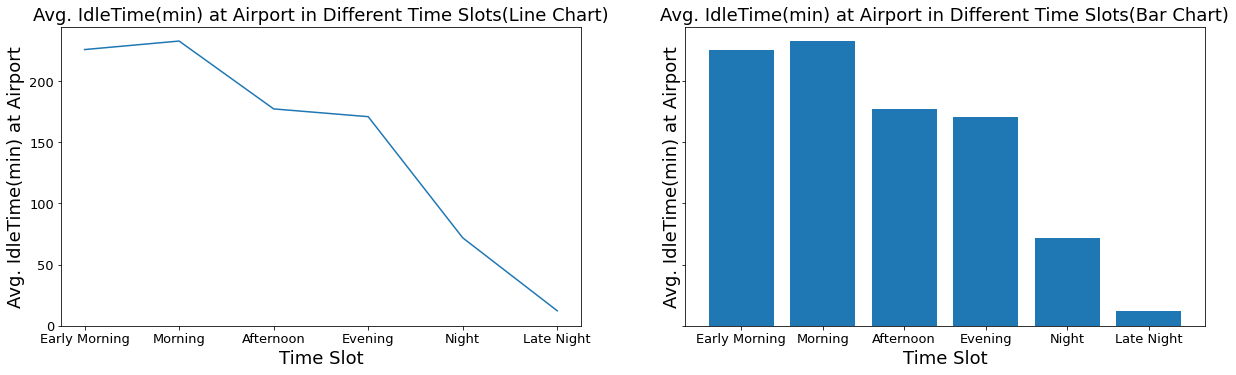

In [85]:
#Bar chart is used below as it helps in comparing different categories easily.
#Line Chart is used to see if there is any trend in data.
#Plotting average idle time at Airport for all time slots 
fig, ax = plt.subplots(ncols=2, sharey=True)

line_chart, = ax[0].plot(airport_columns,airport_values)
ax[0].set_xlabel('Time Slot',fontsize=18)
ax[0].set_ylabel('Avg. IdleTime(min) at Airport',fontsize=18)
ax[0].tick_params(labelsize=13)
ax[0].set_title('Avg. IdleTime(min) at Airport in Different Time Slots(Line Chart)',fontsize =18)

bar_chart = ax[1].bar(airport_columns,airport_values)
ax[1].set_xlabel('Time Slot', fontsize=18)
ax[1].set_ylabel('Avg. IdleTime(min) at Airport',fontsize=18)
ax[1].tick_params(labelsize=13)
ax[1].set_title('Avg. IdleTime(min) at Airport in Different Time Slots(Bar Chart)',fontsize =18)


fig.set_size_inches(20.5, 5.5, forward=True)
plt.show()


#### Why Idle Time is More in Early Morning/Morning Time Slots?

- It can be observed from the above graphs that during early morning and morning hour the avg idle time is high which might be due to the reason that in morning time most of the flights go from one city to other.So it might be that there are more trips to airport rather than from airport to city.
- During Afternoon and Evening time slots frequency of flight are more, we see that idle time is less as compared to morning time and drivers usually get their return journey.
- For Night and late night the idle time is very low as many drivers do not operate during that time, so the average idle time would be less in that case as there are not many trips to airport at night.


<Figure size 1080x648 with 0 Axes>

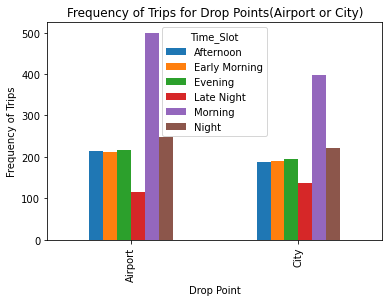

In [86]:
#Bar chart is used below as it helps in comparing different categories easily.
#Plotting frequecy of trips for different pickup points
plt.figure(figsize=(15,9))
df_1[df_1['Status'] == 'Trip Completed'].groupby(['Drop Point','Time_Slot']).size().unstack().plot.bar()
plt.title('Frequency of Trips for Drop Points(Airport or City)')
plt.ylabel('Frequency of Trips')
plt.show()

- From above bar graph we can actually see that in morning time slot more trips are there to airport as compared to trips from airport to city which gives to rise of idle time.
- This also matches with the conclusion that we made when analyzing the idle time during different hours of day.
- <b>So, there can by one hypothesis based on the findings of idle time is that during the morning hours idle time is much more as compared to rest of the day.</b>

####  Analyzing for which time slot during the day the trips are getting cancelled or driver is not available

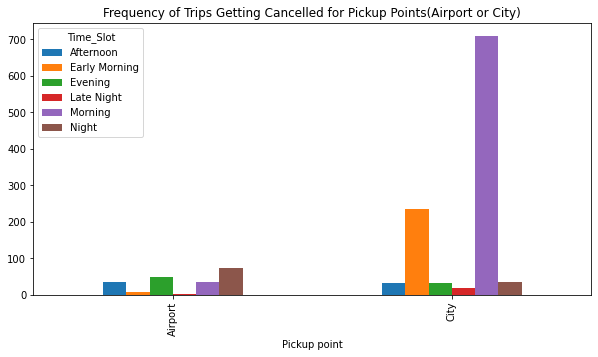

In [87]:
#Bar chart is used below as it helps in comparing different categories easily.
#Plotting a bar chart for Cancelled Trips for Different Time Slots
df_1[df_1['Status'] == 'Cancelled'].groupby(['Pickup point','Time_Slot']).size().unstack(fill_value=0).plot(kind = 'bar',figsize=(10,5))
plt.title('Frequency of Trips Getting Cancelled for Pickup Points(Airport or City)')
plt.show()

<b>Question:Identify the most problematic types of requests (city to airport/airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots where trips are cancelled</b>.<br><br>
<b>During which time_slot frequency of trips getting cancelled are high?</b>
- Most of the trips which are cancelled by the drivers are from <u>city to airport</u> during morning hour as indicated by violet bar above under city label.
- This coincides with the observation that idle time is more during early morning/morning hours which can lead to drivers cancelling the requests.
- So, it  be can concluded that a large proportion of trips get <b>cancelled</b> from <b><u>city to airport during morning hour</u></b>.
- For Afternoon and evening the trips getting cancelled are less as idle time was also less in this period.So, the driver does not have to wait much to get next ride and he can earn more which leads to accepting the ride request.
- For trips from <b><u>airport to city night time</b></u> is usually when most of the rides are cancelled.Night time is usually after 9 or 10 pm which indicates the end of day for many drivers, so it can happen that they cancel these rides as it end of day for them.



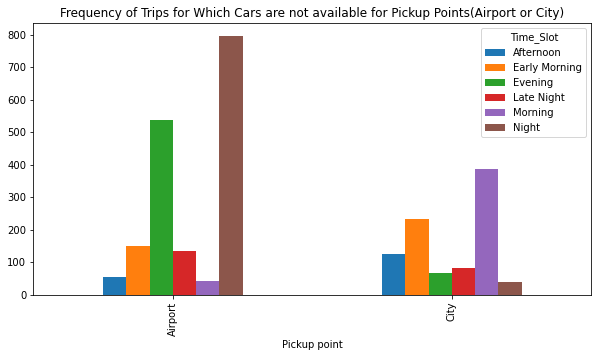

In [88]:
#Bar chart is used below as it helps in comparing different categories easily.
#Plotting a bar chart for No Cars Available for Different Time Slots
df_1[df_1['Status'] == 'No Cars Available'].groupby(['Pickup point','Time_Slot']).size().unstack().plot(kind = 'bar',figsize=(10,5))
plt.title('Frequency of Trips for Which Cars are not available for Pickup Points(Airport or City)')
plt.show()

#### During which time_slot we can see the maximum number of cars not available?
- For pickup point <b>airport</b> a large proportion of <u>cars are not available</u> during <b>night time</b> as observed from the above bar graph.
- As during night time very few drivers operate this can lead to less number of cars available.
- For pickup point <b>city</b> a large proportion of <u>cars are not available</u> during the <b>morning time</b> which might be due to the reason that idle time is usually high during morning hours.
- It can be conculded that when pickup point is Airport during night time usually the cars are not available.

### Supply and Demand Analysis

Visualizing the number of Trip Requests made to airport or city during different time slots

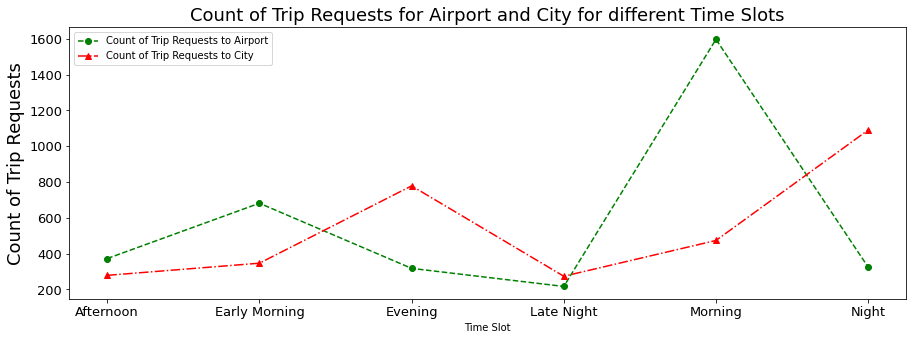

In [89]:
#Line chart is used below as it helps in identifying the trend in data.
plt.figure(figsize=(15,5))
plt.plot(df_1[df_1['Drop Point'] == 'Airport'].groupby(['Time_Slot']).size(),color='green', linestyle='dashed', marker='o')
plt.plot(df_1[df_1['Drop Point'] == 'City'].groupby(['Time_Slot']).size(),color='red', linestyle='dashdot', marker='^')
plt.legend(labels=['Count of Trip Requests to Airport','Count of Trip Requests to City'])
plt.xlabel('Time Slot',fontsize=10)
plt.ylabel('Count of Trip Requests',fontsize=18)
plt.tick_params(labelsize=13)
plt.title('Count of Trip Requests for Airport and City for different Time Slots',fontsize =18)
plt.show()


- From the above graph we can see that when destination is Airport early morning/morning time slot have the highest number of trip requests.
    - This can be due to various flights going out of the city in morning, so customers tend to go to airport during this time.
- At the same time where destination is city we can see that in early morning and morning time slots the trip requests count are not that much high which can help in understanding why the idle time is more during the morning hour.
- Trip requests are high for destination city during the night time as international flights operate during these hours which leads to more people going to city from airport.

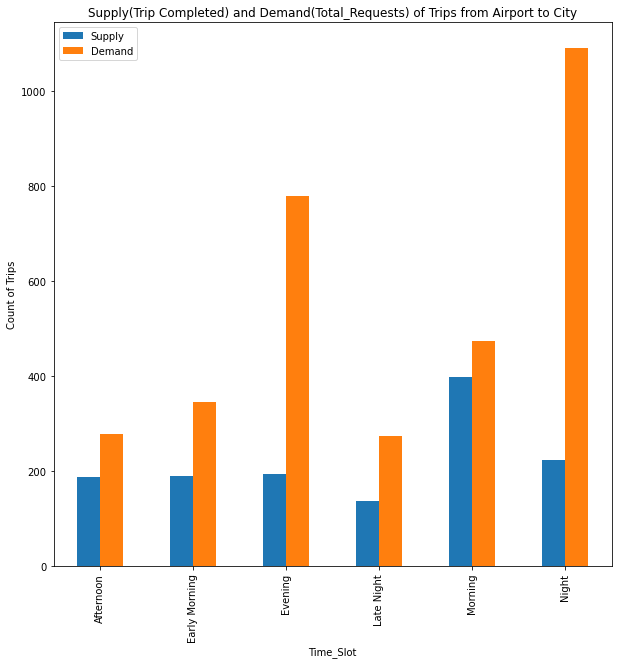

In [90]:
#Bar chart is used below as it helps in comparing different categories easily.
#Supply and demand for trips from Airport to City
df_trips = df_1[df_1['Pickup point'] == 'Airport'].groupby(['Time_Slot','Status']).size().unstack()
df_trips['Total_Requests'] = df_trips['Cancelled'] + df_trips['No Cars Available'] + df_trips['Trip Completed']
df_trips.drop('Cancelled',inplace=True,axis=1)
df_trips.drop('No Cars Available',inplace=True,axis=1)
ax = df_trips.plot(kind = 'bar',figsize=(10,10))
ax.legend(labels=['Supply','Demand'])
plt.title('Supply(Trip Completed) and Demand(Total_Requests) of Trips from Airport to City')
plt.ylabel('Count of Trips')
plt.show()


<b>Question: Find the time slots when the highest gap exists</b>
- From the above graph it can be observed that there is a <b>huge difference<b/> between the <u>trips completed</u> and <u>total trips request</u> during <b>night, evening and late night time slots for trips from Airport to City</b>.
- For Afternoon, early morning morning most of the trips were completed suggesting that supply met the demand at that time.
- It can be concluded that <b>night, evening and late night time slots i.e 4-12 am </b> have more demand as compared to supply at  Airport.

    

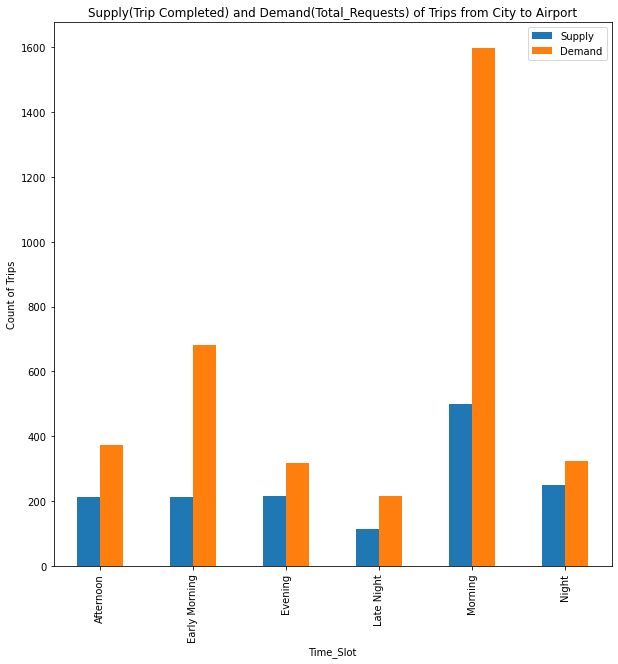

In [91]:
#Bar chart is used below as it helps in comparing different categories easily.
df_trips = df_1[df_1['Pickup point'] == 'City'].groupby(['Time_Slot','Status']).size().unstack()
df_trips['Total_Requests'] = df_trips['Cancelled'] + df_trips['No Cars Available'] + df_trips['Trip Completed']
df_trips.drop('Cancelled',inplace=True,axis=1)
df_trips.drop('No Cars Available',inplace=True,axis=1)
ax = df_trips.plot(kind = 'bar',figsize=(10,10))
ax.legend(labels=['Supply','Demand'])
plt.title('Supply(Trip Completed) and Demand(Total_Requests) of Trips from City to Airport')
plt.ylabel('Count of Trips')
plt.show()


- From the above graph it can be observed that there is a <b>huge difference<b/> between the <u>trips completed</u> and <u>total trips request</u> during <b>morning, early morning time slots for trips from City to Airport </b>.
- For night, late night, afternoon and evening time slots most of the trips were completed suggesting that supply met the demand at that time.
- It can be concluded that <b>morning and early morning time slots i.e around 3 am-12 pm    </b> have more demand as compared to supply at City.

From the above analysis we can infer that:
- At <b> Airport</b> <u>evening, night and late night time i.e 4 pm - 12 am</u> time slots supply is less but demand is more.
- At <b>City </b> <u>early morning and morning i.e around 3 am-12 pm  </u> time slots supply is less but demand is more.

#### Question : Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

#### Comparing night, evening and late night time slots for trips b/w Airport and City to see which has the highest supply and demand gap i.e from airport to city or city to airport.

In [92]:
#Creating a multindex data frame to analyze hich has the highest supply and demand gap i.e from airport to city or city to airport
time_slots = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
multi_index = [time_slots,['TotalRequests','Trip Completed']]

index = pd.MultiIndex.from_product(multi_index,names=['Time_Slot', 'Status'])

columns = ['Airport','City']

data = []
for time_slot in time_slots:
    TotalRequests_airport = len(df_1[(df_1['Time_Slot'] == time_slot) & (df_1['Pickup point'] == 'Airport')])
    TotalRequests_city = len(df_1[(df_1['Time_Slot'] == time_slot) & (df_1['Pickup point'] == 'City')])
    TripCompleted_airport = len(df_1[(df_1['Time_Slot'] == time_slot) & (df_1['Status'] == 'Trip Completed') & (df_1['Pickup point'] == 'Airport')])
    TripCompleted_city = len(df_1[(df_1['Time_Slot'] == time_slot) & (df_1['Status'] == 'Trip Completed') & (df_1['Pickup point'] == 'City')])
    data.append([TotalRequests_airport,TotalRequests_city])
    data.append([TripCompleted_airport,TripCompleted_city])
    

df_supply_demand = pd.DataFrame(data, index, columns)

In [93]:
df_supply_demand

Airport  City
Time_Slot     Status                       
Early Morning TotalRequests       346   681
              Trip Completed      189   212
Morning       TotalRequests       473  1597
              Trip Completed      398   500
Afternoon     TotalRequests       278   372
              Trip Completed      188   213
Evening       TotalRequests       778   317
              Trip Completed      194   216
Night         TotalRequests      1090   324
              Trip Completed      222   249
Late Night    TotalRequests       273   216
              Trip Completed      136   114

In [94]:
#Calculating Complete Request Ration
def get_complete_request_ratio(data, pickupPoint , time_slot):
    complete_request_ratio = (df_supply_demand[pickupPoint].get((time_slot, 'Trip Completed'))/
                                       df_supply_demand[pickupPoint].get((time_slot, 'TotalRequests')))*100
    return complete_request_ratio

In [95]:
#Comparing night time trips from Airport to city and  City to Airport
time_slot = 'Evening'
pickupPoint = 'Airport'
print(f'Complete request ratio from Airport to City for time_slot {time_slot} is :{get_complete_request_ratio(df_supply_demand,pickupPoint,time_slot)}')

pickupPoint = 'City'
print(f'Complete request ratio from City to Airport for time_slot {time_slot} is :{get_complete_request_ratio(df_supply_demand,pickupPoint,time_slot)}')


Complete request ratio from Airport to City for time_slot Evening is :24.93573264781491
Complete request ratio from City to Airport for time_slot Evening is :68.13880126182966


- From the above analysis we can see that for <b>evening time</b> trips from <b>Airport to city</b> have a <b>lower ratio of TripsCompleted/TotalTrip Requests</b> which suggests that a high number of trips were not completed and accepted.
- This leads to huge gap in supply and demand for cabs during this slot time.

In [96]:
#Comparing night time trips from Airport to city and  City to Airport
time_slot = 'Night'
pickupPoint = 'Airport'
print(f'Complete request ratio from Airport to City for time_slot {time_slot} is :{get_complete_request_ratio(df_supply_demand,pickupPoint,time_slot)}')

pickupPoint = 'City'
print(f'Complete request ratio from City to Airport for time_slot {time_slot} is :{get_complete_request_ratio(df_supply_demand,pickupPoint,time_slot)}')


Complete request ratio from Airport to City for time_slot Night is :20.36697247706422
Complete request ratio from City to Airport for time_slot Night is :76.85185185185185


- From the above analysis we can see that for <b>night time</b> trips from <b>Airport to city</b> have a <b>lower ratio of TripsCompleted/TotalTrip Requests</b> which suggests that a high number of trips were not completed and accepted.
- This leads to huge gap in supply and demand for cabs.
- This behaviour can be due to the fact that during night time we saw that most of the cars were not available at airport so the supply could not be met.

In [97]:
#Comparing late Night time trips from Airport to city and  City to Airport
time_slot = 'Late Night'
pickupPoint = 'Airport'
print(f'Complete request ratio from Airport to City for time_slot {time_slot} is :{get_complete_request_ratio(df_supply_demand,pickupPoint,time_slot)}')

pickupPoint = 'City'
print(f'Complete request ratio from City to Airport for time_slot {time_slot} is :{get_complete_request_ratio(df_supply_demand,pickupPoint,time_slot)}')



Complete request ratio from Airport to City for time_slot Late Night is :49.81684981684982
Complete request ratio from City to Airport for time_slot Late Night is :52.77777777777778


- From the above analysis we can see that for <b>late night time</b> trips from <b>Airport to city</b> have a <b>lower ratio of TripsCompleted/TotalTrip Requests</b> which suggests that a high number of trips were not completed.
- This leads to a gap in supply and demand for cabs.
- This behaviour can be due to the fact that during late night time most of the drivers do not operate

In [98]:
#Comparing Early Morning trips from Airport to city and  City to Airport
time_slot = 'Early Morning'
pickupPoint = 'Airport'
print(f'Complete request ratio from Airport to City for time_slot {time_slot} is :{get_complete_request_ratio(df_supply_demand,pickupPoint,time_slot)}')

pickupPoint = 'City'
print(f'Complete request ratio from City to Airport for time_slot {time_slot} is :{get_complete_request_ratio(df_supply_demand,pickupPoint,time_slot)}')



Complete request ratio from Airport to City for time_slot Early Morning is :54.6242774566474
Complete request ratio from City to Airport for time_slot Early Morning is :31.130690161527163


- From the above analysis we can see that for <b>early morning</b> trips from <b>City to Airport</b> have a <b>lower ratio of TripsCompleted/TotalTrip Requests</b> which suggests that a high number of trips were not completed.
- This leads to a gap in supply and demand for cabs.
- This behaviour can be due to the fact that in the earlier analysis we saw that most of the trips were cancelled by drivers or car was not available in morning time slot lead to trips not being completed.

In [99]:
#Comparing Morning trips from Airport to city and  City to Airport
time_slot = 'Morning'
pickupPoint = 'Airport'
print(f'Complete request ratio from Airport to City for time_slot {time_slot} is :{get_complete_request_ratio(df_supply_demand,pickupPoint,time_slot)}')

pickupPoint = 'City'
print(f'Complete request ratio from City to Airport for time_slot {time_slot} is :{get_complete_request_ratio(df_supply_demand,pickupPoint,time_slot)}')



Complete request ratio from Airport to City for time_slot Morning is :84.14376321353065
Complete request ratio from City to Airport for time_slot Morning is :31.308703819661865


- From the above analysis we can see that for <b>morning</b> trips from <b>City to Airport</b> have a <b>lower ratio of TripsCompleted/TotalTrip Requests</b> which suggests that a high number of trips were not completed.
- This leads to a gap in supply and demand for cabs.
- This behaviour can be due to the fact that in the earlier analysis we saw that most of the trips were cancelled by drivers or car was not available in morning time slot lead to trips not being completed.
- Morover the ideal time was also high at airport during morning hour which can suggest that driver tend to cancel the trips as it will be difficult for them to get a return journey.

#### Inflow and Outflow of Trips from City-Airport and Airport-City

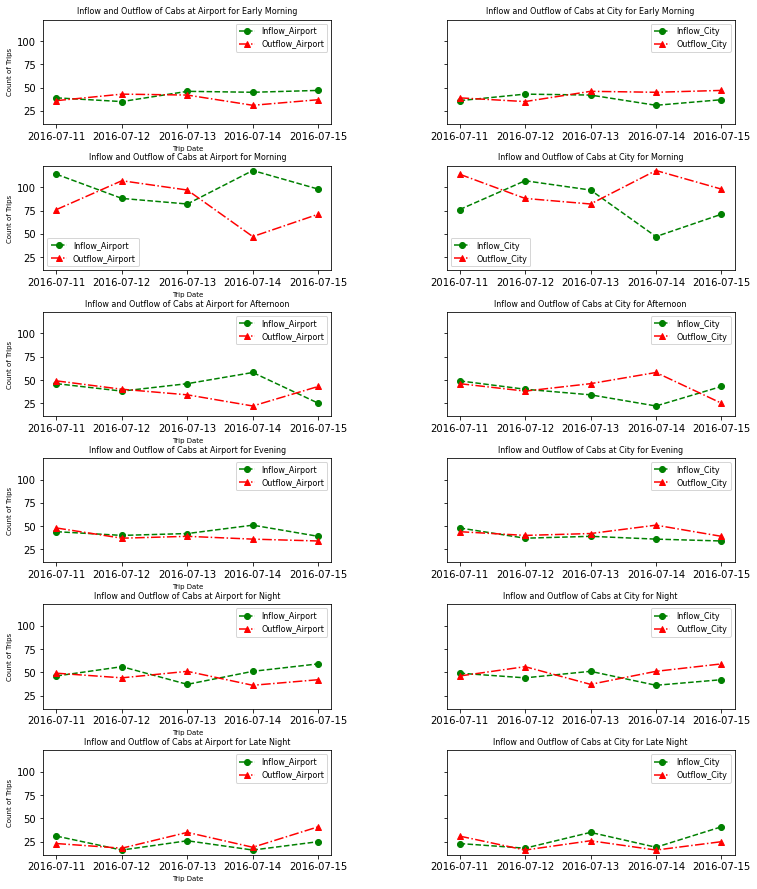

In [100]:
#Line chart is used below as it helps in identifying trend for a numerical value like inflow or outflow
'''
Inflow is calculated at Airport or City by taking into account the number of trips coming into the location(Airport or city)'
for a time slot.

Outflow is calculated at Airport or City by taking into account the number of trips going out of location(Airport or city)'
for a time slot.

Below calculation is done for each unique trip date for all the trips that occur during that date.
Considering the trips which have status as Completed to calculate the inflow and outflow.
'''
time_slots = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
multi_index = [time_slots,['Inflow','Outflow']]
dates = list(sorted(df_1['Trip_Request_Date'].unique()))

# plt.figure(figsize=(15,12))
fig, ax = plt.subplots(6,2, sharey=True)


row_index = 0
col_index = 0
for time_slot in time_slots:
    
    data_inflow_airport = []
    data_outflow_airport = []
    
    data_inflow_city = []
    data_outflow_city = []
    
    data_xlabels = []
    for date in dates:
        inflow_airport = len(df_1[(df_1['Time_Slot'] == time_slot) & (df_1['Pickup point'] == 'City') & (df_1['Trip_Request_Date'] == date) 
                                 & (df_1['Status'] == 'Trip Completed')])
        outflow_airport = len(df_1[(df_1['Time_Slot'] == time_slot) & (df_1['Pickup point'] == 'Airport') & (df_1['Trip_Request_Date'] == date)
                                  & (df_1['Status'] == 'Trip Completed')])
        data_inflow_airport.append(inflow_airport)
        data_outflow_airport.append(outflow_airport)
        
        data_xlabels.append(str(date))
        
        inflow_city = len(df_1[(df_1['Time_Slot'] == time_slot) & (df_1['Pickup point'] == 'Airport') & (df_1['Trip_Request_Date'] == date) 
                                 & (df_1['Status'] == 'Trip Completed')])
        outflow_city = len(df_1[(df_1['Time_Slot'] == time_slot) & (df_1['Pickup point'] == 'City') & (df_1['Trip_Request_Date'] == date)
                                  & (df_1['Status'] == 'Trip Completed')])
        data_inflow_city.append(inflow_city)
        data_outflow_city.append(outflow_city)
            
    line_chart, = ax[row_index][0].plot(data_xlabels,data_inflow_airport,color='green', linestyle='dashed', marker='o')
    line_chart1, = ax[row_index][0].plot(data_xlabels,data_outflow_airport,color='red', linestyle='dashdot', marker='^')
    ax[row_index][0].legend(labels=['Inflow_Airport','Outflow_Airport'],fontsize = 8,loc='best')
    ax[row_index][0].set_title(f'Inflow and Outflow of Cabs at Airport for {time_slot}',fontsize =8)
    
    line_chart2, = ax[row_index][1].plot(data_xlabels,data_inflow_city,color='green', linestyle='dashed', marker='o')
    line_chart3, = ax[row_index][1].plot(data_xlabels,data_outflow_city,color='red', linestyle='dashdot', marker='^')
    ax[row_index][1].legend(labels=['Inflow_City','Outflow_City'],fontsize = 8,loc='best')
    ax[row_index][1].set_title(f'Inflow and Outflow of Cabs at City for {time_slot}',fontsize =8)

    ax[row_index][0].set_ylabel('Count of Trips',fontsize=7)
    ax[row_index][0].set_xlabel('Trip Date',fontsize=7)
    
    

    row_index += 1

fig.set_size_inches(12, 4, forward=True)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=3, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

- We can see from the above graphs is that if inflow is high at airport for a particular time slot then for the same time slot outflow is high from the city region which is the expected behaviour.
- Inflow and outflow of cabs can help in identifying the time slots where we can redistribute the cabs to manage the supply demand gap.
- For <b>early morning and morning </b> time slots inflow of cabs to airport is more as compared to outflow from the Airport.
- For <b>early morning and morning </b> time slots inflow of cabs to city is less as compared to outflow from the city.
    - As we observed earlier that in city during morning and early morning time the supply is less but demand is more.
    - One of the reasons for the same could be that inflow of cabs is very less so customers may not have much options for booking the cabs which can lead to gap in supply and demand.
- For <b>Afternoon</b> time slot inflow of cabs to airport is more for some of the dates as compared to outflow from the Airport.
    - This behaviour can be due to heavy traffic of flights going out from the city leading to customers booking cab trips to Airport which we earlier saw that total requests for afternoon is high for pickup point City.
- For <b>Afternoon</b> time slot inflow of cabs to city is less as compared to outflow from the city as the demand from City to airport is not that much high during this time slot.
- For <b>Evening, night and late night</b> time slots inflow of cabs to airport is less for some of the dates as compared to outflow from the Airport.
- For <b>Evening, night and late night</b> time slots inflow of cabs to city is more for some of the dates as compared to outflow from the Airport.
    - As we observed earlier that in airport during evening,night and late night time slot the supply is less but demand is more.
    - One of the reasons for the same could be that inflow of cabs is very less so customers may not have much options for booking the cabs which can lead to gap in supply and demand.



<b>Question:What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. </b>

Based on above analysis done till now, following might be the reasons for issue in supply-demand:
- At Airport night, evening and late night time i.e. around 4 pm-12 am time slots supply is less but demand is more.
    - This can be due to the reason that inflow of cabs to airport is less during this time frame which leads to the status of       'Cars not available' and leading to less of supply.
    - The idle time in evening and night is also significant which can lead to drivers not accepting the rides as they do not get return journey easily. This can lead to trips getting 'Cancelled' which increases the gap between supply and demand.
- At city night, early morning and morning i.e. around 3 am - 12 pm time slots supply is less but demand is more.
    - This can be due to the reason that inflow of cabs at city is less during early morning and morning which leads to the status of 'Cars not available' and leading to less of supply.
    - Most of the trips get Cancelled during morning time for pickup point city as indicated earlier which leads to gap in supply and demand.

<b> Ways to Solve Supply-Demand Issue </b><br><br>
Actions that can be taken to resolve the supply and demand issue:
- As inflow of cabs is more at Airport than required during early morning and morning time, we can instruct some drivers to go to city around 3 am-12 pm so that inflow of cabs at the city increases and the supply-demand gap is reduced.
- As inflow of cabs is more at city than required during evening, night and late night time we can instruct some drivers to go to airport between 4pm -12 am so that inflow of cabs at the airport increases and the supply-demand gap is reduced.
- Provide incentives for drivers for airport trips during peak time.
- Impose a penalty for cancellation of requests by the drivers.A threshold to be set for maximum cancellations that can be done in a day.
- Flight patterns can be analyzed and same can be communicated to the drivers so that idle time for the drivers is reduced and less number of trips get cancelled.
    - For e.g. if at morning between 9-10 am there are lot of incoming flights so there might be large number of cab requests. It can be communicated to drivers to reach airport around 8:45 am as flight traffic is to be expected and it would easy to get a ride.This would reduce idle time and also help in supply-demand problem.
